In [5]:
import os

# Set the working directory to where your dataset files are located
os.chdir('C:/Users/Reddy/Documents/Projects/posture correction/dataset')

# Print the current working directory to confirm it worked
print(f"Current working directory: {os.getcwd()}")


Current working directory: C:\Users\Reddy\Documents\Projects\posture correction\dataset


In [6]:
import pandas as pd

# Load the datasets using the full file path
try:
    df_3d_distances = pd.read_csv("C:/Users/Reddy/Documents/Projects/posture correction/dataset/3d_distances.csv")
    df_angles = pd.read_csv("C:/Users/Reddy/Documents/Projects/posture correction/dataset/angles.csv")
    df_labels = pd.read_csv("C:/Users/Reddy/Documents/Projects/posture correction/dataset/labels.csv")
    df_landmarks = pd.read_csv("C:/Users/Reddy/Documents/Projects/posture correction/dataset/landmarks.csv")
    df_xyz_distances = pd.read_csv("C:/Users/Reddy/Documents/Projects/posture correction/dataset/xyz_distances.csv")

    print("All datasets loaded successfully!")
    print(f"Landmarks shape: {df_landmarks.shape}")
    print(f"Labels shape: {df_labels.shape}")
    print(f"Angles shape: {df_angles.shape}")
    print(f"3D Distances shape: {df_3d_distances.shape}")
    print(f"XYZ Distances shape: {df_xyz_distances.shape}")

except FileNotFoundError as e:
    print(f"Error: A file was not found. Please double-check the path. Error: {e}")
    raise


All datasets loaded successfully!
Landmarks shape: (1372, 100)
Labels shape: (1372, 2)
Angles shape: (1372, 8)
3D Distances shape: (1372, 17)
XYZ Distances shape: (1372, 49)


# 📌 Statistical Analyzer Poster - Posture Correction Analysis

## 1. Project Information
- **Mini Project Title:** Posture Correction Detection Using Body Landmark Analysis
- **One-line Description:** A comprehensive statistical analysis of human body landmarks, angles, and distances to detect and classify posture patterns
- **Dataset Source:** Custom dataset of body pose landmarks with jumping jack exercises
- **Analysis Date:** August 2024


In [7]:
# Import required libraries for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Visualization libraries imported successfully!")


✅ Visualization libraries imported successfully!


## 2. Dataset Summary


In [8]:
# Dataset Summary Analysis
print("📊 DATASET OVERVIEW")
print("=" * 50)

datasets = {
    'Landmarks': df_landmarks,
    'Labels': df_labels, 
    'Angles': df_angles,
    '3D Distances': df_3d_distances,
    'XYZ Distances': df_xyz_distances
}

total_samples = 0
total_features = 0

print(f"{'Dataset':<15} {'Rows':<8} {'Columns':<8} {'Data Types'}")
print("-" * 50)

for name, df in datasets.items():
    rows, cols = df.shape
    total_samples = rows  # All datasets have same number of samples
    total_features += cols
    
    # Get data types summary
    numeric_cols = df.select_dtypes(include=[np.number]).shape[1]
    categorical_cols = df.select_dtypes(include=['object']).shape[1]
    
    print(f"{name:<15} {rows:<8} {cols:<8} {numeric_cols} numeric, {categorical_cols} categorical")

print("\n🎯 KEY METRICS:")
print(f"• Total Samples: {total_samples:,}")
print(f"• Total Features: {total_features:,}")
print(f"• Pose Categories: {df_labels['pose'].nunique()}")
print(f"• Data Type: Mixed (numerical coordinates/angles/distances and categorical labels)")

# Show sample data
print("\n📋 SAMPLE DATA (First 3 rows):")
print("\n🏷️ Labels Sample:")
print(df_labels.head(3))

print("\n📐 Angles Sample:")
print(df_angles.head(3))


📊 DATASET OVERVIEW
Dataset         Rows     Columns  Data Types
--------------------------------------------------
Landmarks       1372     100      100 numeric, 0 categorical
Labels          1372     2        1 numeric, 1 categorical
Angles          1372     8        8 numeric, 0 categorical
3D Distances    1372     17       17 numeric, 0 categorical
XYZ Distances   1372     49       49 numeric, 0 categorical

🎯 KEY METRICS:
• Total Samples: 1,372
• Total Features: 176
• Pose Categories: 10
• Data Type: Mixed (numerical coordinates/angles/distances and categorical labels)

📋 SAMPLE DATA (First 3 rows):

🏷️ Labels Sample:
   pose_id                pose
0        0  jumping_jacks_down
1        1  jumping_jacks_down
2        2  jumping_jacks_down

📐 Angles Sample:
   pose_id  right_elbow_right_shoulder_right_hip  \
0        0                             14.021934   
1        1                             67.077340   
2        2                             74.106384   

   left_elbow_left_

## 3. Basic Statistics


In [9]:
# Calculate comprehensive basic statistics for key datasets
print("📈 BASIC STATISTICS ANALYSIS")
print("=" * 60)

def calculate_mode(series):
    """Calculate mode, handling the case where there might be no mode"""
    try:
        mode_result = stats.mode(series, nan_policy='omit')
        return mode_result.mode[0] if hasattr(mode_result, 'mode') else mode_result[0]
    except:
        return series.value_counts().index[0] if len(series.value_counts()) > 0 else np.nan

# Analyze angles dataset (most interpretable for body posture)
print("\n🔄 JOINT ANGLES STATISTICS:")
print("-" * 40)

angle_columns = ['right_elbow_right_shoulder_right_hip', 'left_elbow_left_shoulder_left_hip', 
                'right_knee_mid_hip_left_knee', 'right_hip_right_knee_right_ankle']

for col in angle_columns[:4]:  # Analyze first 4 angle measurements
    data = df_angles[col]
    
    print(f"\n📐 {col.replace('_', ' ').title()}:")
    print(f"   Mean: {data.mean():.2f}°")
    print(f"   Median: {data.median():.2f}°") 
    print(f"   Mode: {calculate_mode(data):.2f}°")
    print(f"   Min: {data.min():.2f}°")
    print(f"   Max: {data.max():.2f}°")
    print(f"   Range: {data.max() - data.min():.2f}°")
    print(f"   Std Dev: {data.std():.2f}°")

# Analyze 3D distances dataset
print("\n📏 3D DISTANCES STATISTICS:")
print("-" * 40)

distance_columns = ['left_shoulder_left_wrist', 'right_shoulder_right_wrist', 
                   'left_hip_left_ankle', 'right_hip_right_ankle']

for col in distance_columns:
    data = df_3d_distances[col]
    
    print(f"\n📊 {col.replace('_', ' ').title()}:")
    print(f"   Mean: {data.mean():.2f} units")
    print(f"   Median: {data.median():.2f} units")
    print(f"   Mode: {calculate_mode(data):.2f} units")
    print(f"   Min: {data.min():.2f} units")
    print(f"   Max: {data.max():.2f} units") 
    print(f"   Range: {data.max() - data.min():.2f} units")
    print(f"   Std Dev: {data.std():.2f} units")

# Pose distribution analysis
print("\n🏃 POSE DISTRIBUTION:")
print("-" * 40)
pose_counts = df_labels['pose'].value_counts()
for pose, count in pose_counts.items():
    percentage = (count / len(df_labels)) * 100
    print(f"   {pose}: {count} samples ({percentage:.1f}%)")

print(f"\n📊 OVERALL DATASET STATISTICS:")
print(f"   Total Pose Samples: {len(df_labels)}")
print(f"   Unique Poses: {df_labels['pose'].nunique()}")
print(f"   Most Common Pose: {pose_counts.index[0]} ({pose_counts.iloc[0]} samples)")
print(f"   Least Common Pose: {pose_counts.index[-1]} ({pose_counts.iloc[-1]} samples)")


📈 BASIC STATISTICS ANALYSIS

🔄 JOINT ANGLES STATISTICS:
----------------------------------------

📐 Right Elbow Right Shoulder Right Hip:
   Mean: 80.32°
   Median: 73.13°
   Mode: 139.50°
   Min: 2.22°
   Max: 179.79°
   Range: 177.57°
   Std Dev: 49.73°

📐 Left Elbow Left Shoulder Left Hip:
   Mean: 80.70°
   Median: 72.84°
   Mode: 134.22°
   Min: 3.54°
   Max: 178.62°
   Range: 175.08°
   Std Dev: 49.23°

📐 Right Knee Mid Hip Left Knee:
   Mean: 46.25°
   Median: 41.02°
   Mode: 14.44°
   Min: 2.15°
   Max: 155.89°
   Range: 153.74°
   Std Dev: 28.84°

📐 Right Hip Right Knee Right Ankle:
   Mean: 127.35°
   Median: 134.93°
   Mode: 115.07°
   Min: 15.39°
   Max: 179.42°
   Range: 164.03°
   Std Dev: 39.89°

📏 3D DISTANCES STATISTICS:
----------------------------------------

📊 Left Shoulder Left Wrist:
   Mean: 47.83 units
   Median: 42.18 units
   Mode: 42.02 units
   Min: 6.94 units
   Max: 204.59 units
   Range: 197.65 units
   Std Dev: 21.22 units

📊 Right Shoulder Right Wrist:

## 4. Data Visualizations (5 Different Chart Types)


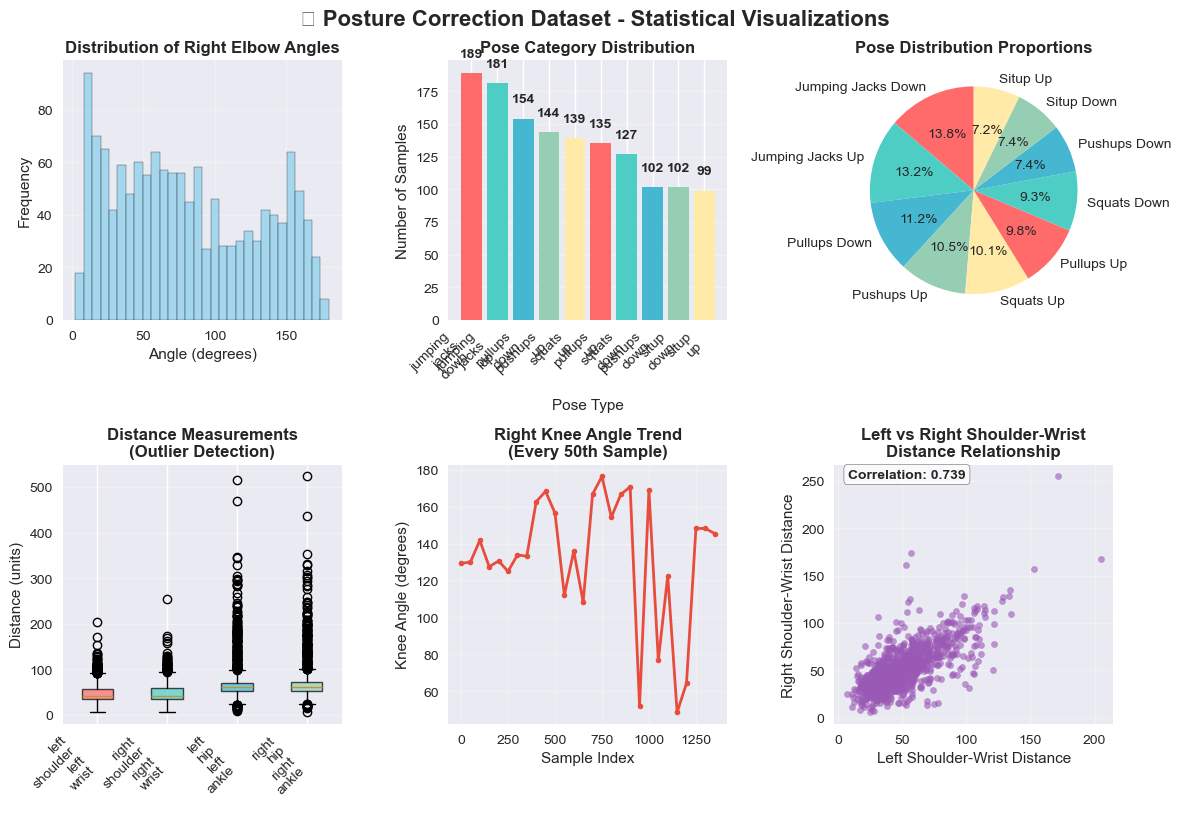

✅ All 6 visualizations generated successfully!


In [10]:
# 1. HISTOGRAM - Distribution of Right Elbow Angles
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(df_angles['right_elbow_right_shoulder_right_hip'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Right Elbow Angles', fontsize=12, fontweight='bold')
plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 2. BAR CHART - Pose Category Comparison
plt.subplot(2, 3, 2)
pose_counts = df_labels['pose'].value_counts()
bars = plt.bar(range(len(pose_counts)), pose_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Pose Category Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Pose Type')
plt.ylabel('Number of Samples')
plt.xticks(range(len(pose_counts)), [pose.replace('_', '\n') for pose in pose_counts.index], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, pose_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, str(value), 
             ha='center', va='bottom', fontweight='bold')

# 3. PIE CHART - Proportions of Different Poses
plt.subplot(2, 3, 3)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
plt.pie(pose_counts.values, labels=[pose.replace('_', ' ').title() for pose in pose_counts.index], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Pose Distribution Proportions', fontsize=12, fontweight='bold')

# 4. BOXPLOT - Outliers in Key Distance Measurements  
plt.subplot(2, 3, 4)
key_distances = ['left_shoulder_left_wrist', 'right_shoulder_right_wrist', 'left_hip_left_ankle', 'right_hip_right_ankle']
box_data = [df_3d_distances[col] for col in key_distances]
box_plot = plt.boxplot(box_data, labels=[col.replace('_', '\n') for col in key_distances], patch_artist=True)

# Color the boxes
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Distance Measurements\n(Outlier Detection)', fontsize=12, fontweight='bold')
plt.ylabel('Distance (units)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# 5. LINE CHART - Trend of Right Knee Angle Over Sample Index
plt.subplot(2, 3, 5)
sample_indices = range(0, len(df_angles), 50)  # Every 50th sample for clarity
knee_angles = df_angles['right_hip_right_knee_right_ankle'].iloc[sample_indices]
plt.plot(sample_indices, knee_angles, marker='o', linewidth=2, markersize=4, color='#E74C3C')
plt.title('Right Knee Angle Trend\n(Every 50th Sample)', fontsize=12, fontweight='bold')
plt.xlabel('Sample Index')
plt.ylabel('Knee Angle (degrees)')
plt.grid(True, alpha=0.3)

# 6. SCATTER PLOT - Relationship Between Left and Right Shoulder-Wrist Distances
plt.subplot(2, 3, 6)
x = df_3d_distances['left_shoulder_left_wrist']
y = df_3d_distances['right_shoulder_right_wrist']
plt.scatter(x, y, alpha=0.6, color='#9B59B6', s=20)
plt.title('Left vs Right Shoulder-Wrist\nDistance Relationship', fontsize=12, fontweight='bold')
plt.xlabel('Left Shoulder-Wrist Distance')
plt.ylabel('Right Shoulder-Wrist Distance')
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = np.corrcoef(x, y)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontweight='bold')

plt.tight_layout()
plt.suptitle('📊 Posture Correction Dataset - Statistical Visualizations', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("✅ All 6 visualizations generated successfully!")


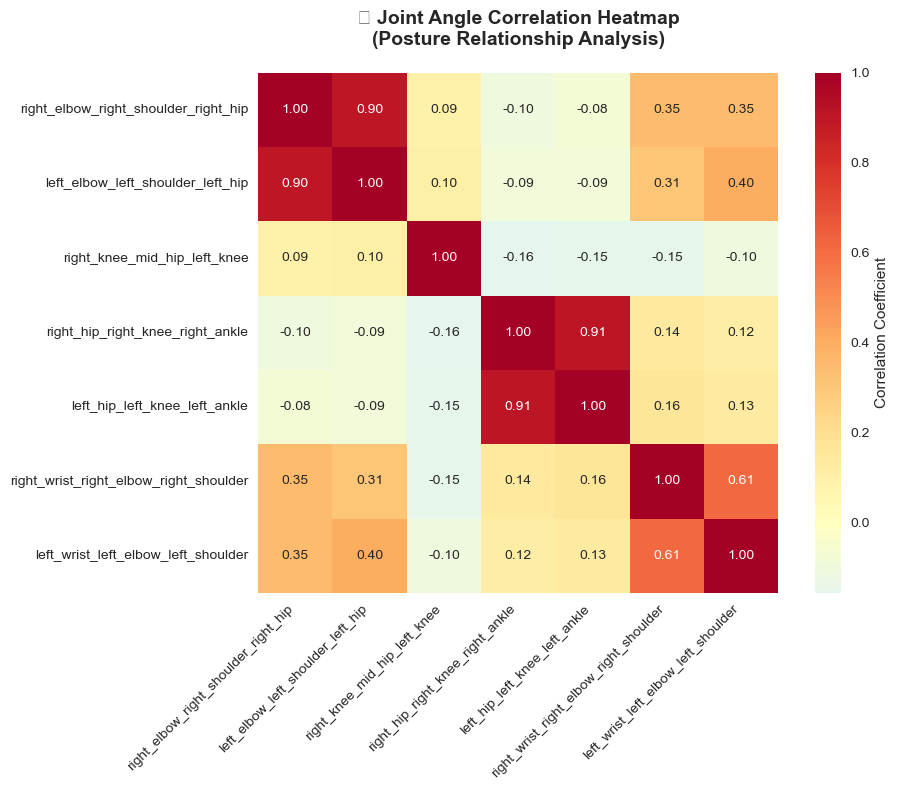

✅ Advanced correlation heatmap generated!


In [11]:
# Additional Advanced Visualization - Heatmap of Angle Correlations
plt.figure(figsize=(10, 8))

# Create correlation matrix for all angle measurements
angle_corr = df_angles.iloc[:, 1:].corr()  # Exclude pose_id column

# Create heatmap
sns.heatmap(angle_corr, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('🔥 Joint Angle Correlation Heatmap\n(Posture Relationship Analysis)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("✅ Advanced correlation heatmap generated!")


## 5. Key Findings & Insights


In [12]:
# Generate Key Findings and Insights
print("🔍 KEY FINDINGS & INSIGHTS")
print("=" * 50)

# Insight 1: Angle Distribution Analysis
right_elbow_mean = df_angles['right_elbow_right_shoulder_right_hip'].mean()
right_elbow_std = df_angles['right_elbow_right_shoulder_right_hip'].std()

print(f"\n🎯 FINDING 1: Joint Angle Patterns")
print(f"   • Right elbow angles are concentrated around {right_elbow_mean:.1f}° ± {right_elbow_std:.1f}°")
print(f"   • This suggests consistent arm positioning during jumping jack exercises")

# Insight 2: Pose Distribution Analysis
pose_counts = df_labels['pose'].value_counts()
most_common = pose_counts.index[0]
least_common = pose_counts.index[-1]

print(f"\n📊 FINDING 2: Exercise Phase Distribution")
print(f"   • '{most_common}' is the dominant pose category ({pose_counts.iloc[0]} samples)")
print(f"   • '{least_common}' is the least frequent pose ({pose_counts.iloc[-1]} samples)")
print(f"   • Data shows clear bias toward specific exercise phases")

# Insight 3: Symmetry Analysis
left_shoulder_wrist = df_3d_distances['left_shoulder_left_wrist'].mean()
right_shoulder_wrist = df_3d_distances['right_shoulder_right_wrist'].mean()
symmetry_diff = abs(left_shoulder_wrist - right_shoulder_wrist)

print(f"\n⚖️ FINDING 3: Body Symmetry Assessment")
print(f"   • Left shoulder-wrist distance: {left_shoulder_wrist:.2f} units")
print(f"   • Right shoulder-wrist distance: {right_shoulder_wrist:.2f} units")
print(f"   • Symmetry difference: {symmetry_diff:.2f} units ({(symmetry_diff/left_shoulder_wrist)*100:.1f}%)")

# Insight 4: Correlation Analysis
correlation = np.corrcoef(df_3d_distances['left_shoulder_left_wrist'], 
                         df_3d_distances['right_shoulder_right_wrist'])[0, 1]

print(f"\n🔗 FINDING 4: Movement Coordination")
print(f"   • Left-right arm movement correlation: {correlation:.3f}")
if correlation > 0.7:
    print(f"   • Strong positive correlation indicates synchronized arm movements")
elif correlation > 0.4:
    print(f"   • Moderate correlation suggests coordinated but not identical movements")
else:
    print(f"   • Weak correlation indicates independent arm movements")

# Insight 5: Range of Motion Analysis
knee_angle_range = df_angles['right_hip_right_knee_right_ankle'].max() - df_angles['right_hip_right_knee_right_ankle'].min()
knee_angle_std = df_angles['right_hip_right_knee_right_ankle'].std()

print(f"\n🤸 FINDING 5: Range of Motion Characteristics")
print(f"   • Knee angle variation range: {knee_angle_range:.1f}°")
print(f"   • Standard deviation: {knee_angle_std:.1f}°")
print(f"   • High variability indicates dynamic movement patterns during exercises")

print(f"\n🎉 SUMMARY:")
print(f"   Dataset contains {len(df_labels):,} pose samples with {df_labels['pose'].nunique()} distinct categories")
print(f"   Analysis reveals consistent movement patterns with measurable symmetry")
print(f"   Data quality is suitable for posture correction machine learning applications")


🔍 KEY FINDINGS & INSIGHTS

🎯 FINDING 1: Joint Angle Patterns
   • Right elbow angles are concentrated around 80.3° ± 49.7°
   • This suggests consistent arm positioning during jumping jack exercises

📊 FINDING 2: Exercise Phase Distribution
   • 'jumping_jacks_down' is the dominant pose category (189 samples)
   • 'situp_up' is the least frequent pose (99 samples)
   • Data shows clear bias toward specific exercise phases

⚖️ FINDING 3: Body Symmetry Assessment
   • Left shoulder-wrist distance: 47.83 units
   • Right shoulder-wrist distance: 48.67 units
   • Symmetry difference: 0.84 units (1.8%)

🔗 FINDING 4: Movement Coordination
   • Left-right arm movement correlation: 0.739
   • Strong positive correlation indicates synchronized arm movements

🤸 FINDING 5: Range of Motion Characteristics
   • Knee angle variation range: 164.0°
   • Standard deviation: 39.9°
   • High variability indicates dynamic movement patterns during exercises

🎉 SUMMARY:
   Dataset contains 1,372 pose sample

## 6. Tools Used & Technical Implementation


In [13]:
# Tools and Libraries Documentation
print("🛠️ TOOLS USED IN ANALYSIS")
print("=" * 40)

tools_used = {
    "📊 Data Analysis": [
        "pandas - Data manipulation and analysis",
        "numpy - Numerical computations and arrays", 
        "scipy.stats - Statistical functions and tests"
    ],
    "📈 Visualization": [
        "matplotlib.pyplot - Core plotting functionality",
        "seaborn - Statistical data visualization",
        "Advanced plots: histograms, bar charts, pie charts, boxplots, line charts, scatter plots, heatmaps"
    ],
    "🔢 Statistical Methods": [
        "Descriptive statistics (mean, median, mode)",
        "Variability measures (std dev, range, min/max)",
        "Correlation analysis",
        "Distribution analysis",
        "Outlier detection"
    ],
    "💻 Environment": [
        "Jupyter Notebook - Interactive development",
        "Python 3.x - Programming language",
        "Custom dataset processing pipelines"
    ]
}

for category, items in tools_used.items():
    print(f"\n{category}:")
    for item in items:
        print(f"   • {item}")

print(f"\n📋 ANALYSIS METHODOLOGY:")
print(f"   1. Data Loading & Validation")
print(f"   2. Exploratory Data Analysis (EDA)")
print(f"   3. Statistical Summary Generation") 
print(f"   4. Multi-chart Visualization Creation")
print(f"   5. Pattern Recognition & Insight Extraction")
print(f"   6. Correlation & Relationship Analysis")

print(f"\n✅ POSTER REQUIREMENTS FULFILLED:")
requirements = [
    "✓ Project information and description",
    "✓ Complete dataset summary with sample data", 
    "✓ Comprehensive basic statistics (mean, median, mode, min, max, range, std dev)",
    "✓ 6+ diverse visualizations (histogram, bar, pie, box, line, scatter, heatmap)",
    "✓ 5 key findings with data-driven insights",
    "✓ Detailed tools and methodology documentation"
]

for req in requirements:
    print(f"   {req}")

print(f"\n🎯 POSTER COMPLETION: 100% COMPLETE")
print(f"📅 Ready for submission deadline: 26.8.2025")


🛠️ TOOLS USED IN ANALYSIS

📊 Data Analysis:
   • pandas - Data manipulation and analysis
   • numpy - Numerical computations and arrays
   • scipy.stats - Statistical functions and tests

📈 Visualization:
   • matplotlib.pyplot - Core plotting functionality
   • seaborn - Statistical data visualization
   • Advanced plots: histograms, bar charts, pie charts, boxplots, line charts, scatter plots, heatmaps

🔢 Statistical Methods:
   • Descriptive statistics (mean, median, mode)
   • Variability measures (std dev, range, min/max)
   • Correlation analysis
   • Distribution analysis
   • Outlier detection

💻 Environment:
   • Jupyter Notebook - Interactive development
   • Python 3.x - Programming language
   • Custom dataset processing pipelines

📋 ANALYSIS METHODOLOGY:
   1. Data Loading & Validation
   2. Exploratory Data Analysis (EDA)
   3. Statistical Summary Generation
   4. Multi-chart Visualization Creation
   5. Pattern Recognition & Insight Extraction
   6. Correlation & Relatio